In [30]:
#I will be loading the data and showing the columns and more information about the dataset
import pandas as pd
youth_data = pd.read_csv("youth_data.csv")
print(youth_data.shape)
print(youth_data.columns)
print(youth_data.info())

(10561, 79)
Index(['IRALCFY', 'IRMJFY', 'IRCIGFM', 'IRSMKLSS30N', 'IRALCFM', 'IRMJFM',
       'IRCIGAGE', 'IRSMKLSSTRY', 'IRALCAGE', 'IRMJAGE', 'MRJFLAG', 'ALCFLAG',
       'TOBFLAG', 'ALCYDAYS', 'MRJYDAYS', 'ALCMDAYS', 'MRJMDAYS', 'CIGMDAYS',
       'SMKLSMDAYS', 'SCHFELT', 'TCHGJOB', 'AVGGRADE', 'STNDSCIG', 'STNDSMJ',
       'STNDALC', 'STNDDNK', 'PARCHKHW', 'PARHLPHW', 'PRCHORE2', 'PRLMTTV2',
       'PARLMTSN', 'PRGDJOB2', 'PRPROUD2', 'ARGUPAR', 'YOFIGHT2', 'YOGRPFT2',
       'YOHGUN2', 'YOSELL2', 'YOSTOLE2', 'YOATTAK2', 'PRPKCIG2', 'PRMJEVR2',
       'PRMJMO', 'PRALDLY2', 'YFLPKCG2', 'YFLTMRJ2', 'YFLMJMO', 'YFLADLY2',
       'FRDPCIG2', 'FRDMEVR2', 'FRDMJMON', 'FRDADLY2', 'TALKPROB', 'PRTALK3',
       'PRBSOLV2', 'PREVIOL2', 'PRVDRGO2', 'GRPCNSL2', 'PREGPGM2', 'YTHACT2',
       'DRPRVME3', 'ANYEDUC3', 'RLGATTD', 'RLGIMPT', 'RLGDCSN', 'RLGFRND',
       'IRSEX', 'NEWRACE2', 'HEALTH2', 'EDUSCHLGO', 'EDUSCHGRD2', 'EDUSKPCOM',
       'IMOTHER', 'IFATHER', 'INCOME', 'GOVTPROG', 'POVERTY3

In [32]:
# Here am importing relevant Libraries such as numpy used in data cleaning 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


# Checking  for missing values
missing_values = youth_data.isnull().sum()
print("Variables with missing values:")
print(missing_values[missing_values > 0])

# Geting basic statistics for our target variables
print("\nMRJFLAG distribution (ever used marijuana):")
print(youth_data['MRJFLAG'].value_counts())

print("\nMRJYDAYS statistics (days used marijuana in past year):")
print(youth_data['MRJYDAYS'].describe())

print("\nIRMJFM statistics (frequency of marijuana use in past month):")
print(youth_data['IRMJFM'].describe())

Variables with missing values:
TCHGJOB      43
AVGGRADE    716
STNDSCIG    377
STNDSMJ     445
STNDALC     454
STNDDNK     550
PARCHKHW     77
PARHLPHW     89
PRCHORE2     35
PRLMTTV2     68
PARLMTSN    259
PRGDJOB2     63
PRPROUD2     77
ARGUPAR     180
YOFIGHT2     67
YOGRPFT2     64
YOHGUN2      46
YOSELL2      25
YOSTOLE2     40
YOATTAK2     41
PRPKCIG2     96
PRMJEVR2    101
PRMJMO      100
PRALDLY2     91
YFLPKCG2     90
YFLTMRJ2     89
YFLMJMO      92
YFLADLY2     93
FRDPCIG2    146
FRDMEVR2    152
FRDMJMON    152
FRDADLY2    147
TALKPROB    336
PRTALK3     199
PRBSOLV2    286
PREVIOL2    142
PRVDRGO2    102
GRPCNSL2    120
PREGPGM2     98
YTHACT2      68
DRPRVME3    193
ANYEDUC3    167
RLGATTD     288
RLGIMPT     321
RLGDCSN     297
RLGFRND     322
HEALTH2      13
dtype: int64

MRJFLAG distribution (ever used marijuana):
MRJFLAG
0    8971
1    1590
Name: count, dtype: int64

MRJYDAYS statistics (days used marijuana in past year):
count    10561.000000
mean         5.557050
std 

In [34]:
#Lets  Deal with missing values
# For this analysis, lets drop rows with missing values in important predictors
# First lets identify the columns with significant missing values
significant_missing = missing_values[missing_values > 500].index.tolist()
print(f"Columns with significant missing values: {significant_missing}")

# For those  columns with fewer missing values, we can use simpler imputation
youth_data_clean = youth_data.copy()

# For numeric columns with missing values, fill with median value
numeric_cols = youth_data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if youth_data[col].isnull().sum() > 0:
        youth_data_clean[col] = youth_data[col].fillna(youth_data[col].median())

# Lets Check the data types and convert categorical variables to proper types
# Lets Identify binary variables (those with only 0,1 values)
binary_cols = []
for col in youth_data_clean.columns:
    unique_vals = youth_data_clean[col].unique()
    if set(unique_vals).issubset({0, 1}) and len(unique_vals) == 2:
        binary_cols.append(col)
        
print(f"Binary columns: {binary_cols}")

# Lets Create variable groups as erquired  in the assignment instructions
# These will help us organize features for our models
substance_use_vars = ['IRALCFY', 'IRMJFY', 'IRCIGFM', 'IRSMKLSS30N', 'IRALCFM', 
                      'IRMJFM', 'IRCIGAGE', 'IRSMKLSSTRY', 'IRALCAGE', 'IRMJAGE',
                      'MRJFLAG', 'ALCFLAG', 'TOBFLAG', 'ALCYDAYS', 'MRJYDAYS',
                      'ALCMDAYS', 'MRJMDAYS', 'CIGMDAYS', 'SMKLSMDAYS']

demographic_vars = ['IRSEX', 'NEWRACE2', 'HEALTH2', 'EDUSCHLGO', 'EDUSCHGRD2', 
                   'EDUSKPCOM', 'IMOTHER', 'IFATHER', 'INCOME', 'GOVTPROG', 
                   'POVERTY3', 'PDEN10', 'COUTYP4']

youth_exp_vars = [col for col in youth_data_clean.columns 
                 if col not in substance_use_vars and col not in demographic_vars]

Columns with significant missing values: ['AVGGRADE', 'STNDDNK']
Binary columns: ['MRJFLAG', 'ALCFLAG', 'TOBFLAG']


In [36]:
# 1. Binary Classification Target - (Has used marijuana or not)
y_binary = youth_data_clean['MRJFLAG']

# 2. Multi-class Classification Target - Create marijuana frequency categories
# Let's create categories based on IRMJFM (days used in past month)
def categorize_mj_use(days):
    if days == 0:
        return 0  # No use
    elif 1 <= days <= 5:
        return 1  # Light use (1-5 days)
    elif 6 <= days <= 15:
        return 2  # Moderate use (6-15 days)
    else:
        return 3  # Heavy use (16+ days)

youth_data_clean['MJ_CATEGORY'] = youth_data_clean['IRMJFM'].apply(categorize_mj_use)
y_multiclass = youth_data_clean['MJ_CATEGORY']

print("\nMarijuana use categories distribution:")
print(youth_data_clean['MJ_CATEGORY'].value_counts())

# 3. Regression Target - Days used marijuana in past year
y_regression = youth_data_clean['MRJYDAYS']


Marijuana use categories distribution:
MJ_CATEGORY
3    10036
1      344
2      181
Name: count, dtype: int64


In [38]:
# Lets now remove target variables and other marijuana-related variables from predictors
exclude_vars = ['MRJFLAG', 'IRMJFY', 'IRMJFM', 'IRMJAGE', 'MRJYDAYS', 'MRJMDAYS', 'MJ_CATEGORY']

# Lets Create feature set from demographic and youth experience variables
X_features = youth_data_clean[demographic_vars + youth_exp_vars].drop(columns=[v for v in exclude_vars if v in demographic_vars + youth_exp_vars])

# Lets check the feature set
print(f"\nNumber of features: {X_features.shape[1]}")
print(f"Feature names: {X_features.columns.tolist()}")

# Lets Split data for each model type
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_features, y_binary, test_size=0.3, random_state=42)

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_features, y_multiclass, test_size=0.3, random_state=42)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_features, y_regression, test_size=0.3, random_state=42)


Number of features: 60
Feature names: ['IRSEX', 'NEWRACE2', 'HEALTH2', 'EDUSCHLGO', 'EDUSCHGRD2', 'EDUSKPCOM', 'IMOTHER', 'IFATHER', 'INCOME', 'GOVTPROG', 'POVERTY3', 'PDEN10', 'COUTYP4', 'SCHFELT', 'TCHGJOB', 'AVGGRADE', 'STNDSCIG', 'STNDSMJ', 'STNDALC', 'STNDDNK', 'PARCHKHW', 'PARHLPHW', 'PRCHORE2', 'PRLMTTV2', 'PARLMTSN', 'PRGDJOB2', 'PRPROUD2', 'ARGUPAR', 'YOFIGHT2', 'YOGRPFT2', 'YOHGUN2', 'YOSELL2', 'YOSTOLE2', 'YOATTAK2', 'PRPKCIG2', 'PRMJEVR2', 'PRMJMO', 'PRALDLY2', 'YFLPKCG2', 'YFLTMRJ2', 'YFLMJMO', 'YFLADLY2', 'FRDPCIG2', 'FRDMEVR2', 'FRDMJMON', 'FRDADLY2', 'TALKPROB', 'PRTALK3', 'PRBSOLV2', 'PREVIOL2', 'PRVDRGO2', 'GRPCNSL2', 'PREGPGM2', 'YTHACT2', 'DRPRVME3', 'ANYEDUC3', 'RLGATTD', 'RLGIMPT', 'RLGDCSN', 'RLGFRND']


In [40]:
#  Our binary Classification Model
dt_binary = DecisionTreeClassifier(random_state=42)
dt_binary.fit(X_train_binary, y_train_binary)
y_pred_binary = dt_binary.predict(X_test_binary)
print("\nBinary Classification - Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test_binary, y_pred_binary):.4f}")
print(classification_report(y_test_binary, y_pred_binary))

#  our Multi-class Classification Model
dt_multi = DecisionTreeClassifier(random_state=42)
dt_multi.fit(X_train_multi, y_train_multi)
y_pred_multi = dt_multi.predict(X_test_multi)
print("\nMulti-class Classification - Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test_multi, y_pred_multi):.4f}")
print(classification_report(y_test_multi, y_pred_multi))

# Our Regression Model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = dt_reg.predict(X_test_reg)
print("\nRegression - Decision Tree Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.4f}")
print(f"R²: {r2_score(y_test_reg, y_pred_reg):.4f}")


Binary Classification - Decision Tree Results:
Accuracy: 0.8378
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2721
           1       0.44      0.51      0.47       448

    accuracy                           0.84      3169
   macro avg       0.68      0.70      0.69      3169
weighted avg       0.85      0.84      0.84      3169


Multi-class Classification - Decision Tree Results:
Accuracy: 0.9072
              precision    recall  f1-score   support

           1       0.09      0.11      0.10       103
           2       0.02      0.02      0.02        49
           3       0.96      0.95      0.95      3017

    accuracy                           0.91      3169
   macro avg       0.36      0.36      0.36      3169
weighted avg       0.92      0.91      0.91      3169


Regression - Decision Tree Results:
RMSE: 1.6090
R²: -0.6474


In [42]:
# Our the Binary Classification Decision Tree (This is my example )
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                          param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_binary, y_train_binary)

print("\nBest parameters for Decision Tree (Binary Classification):")
print(grid_search.best_params_)

# Lets now get the best model
best_dt_binary = grid_search.best_estimator_
y_pred_best_binary = best_dt_binary.predict(X_test_binary)
print(f"Accuracy with tuned parameters: {accuracy_score(y_test_binary, y_pred_best_binary):.4f}")


Best parameters for Decision Tree (Binary Classification):
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy with tuned parameters: 0.8829



Feature ranking for marijuana use prediction:
1. FRDMJMON (0.5553)
2. STNDSMJ (0.2007)
3. PRMJEVR2 (0.0452)
4. PRMJMO (0.0396)
5. YFLMJMO (0.0323)
6. YOSTOLE2 (0.0298)
7. FRDPCIG2 (0.0295)
8. YOSELL2 (0.0114)
9. YFLTMRJ2 (0.0061)
10. IMOTHER (0.0060)


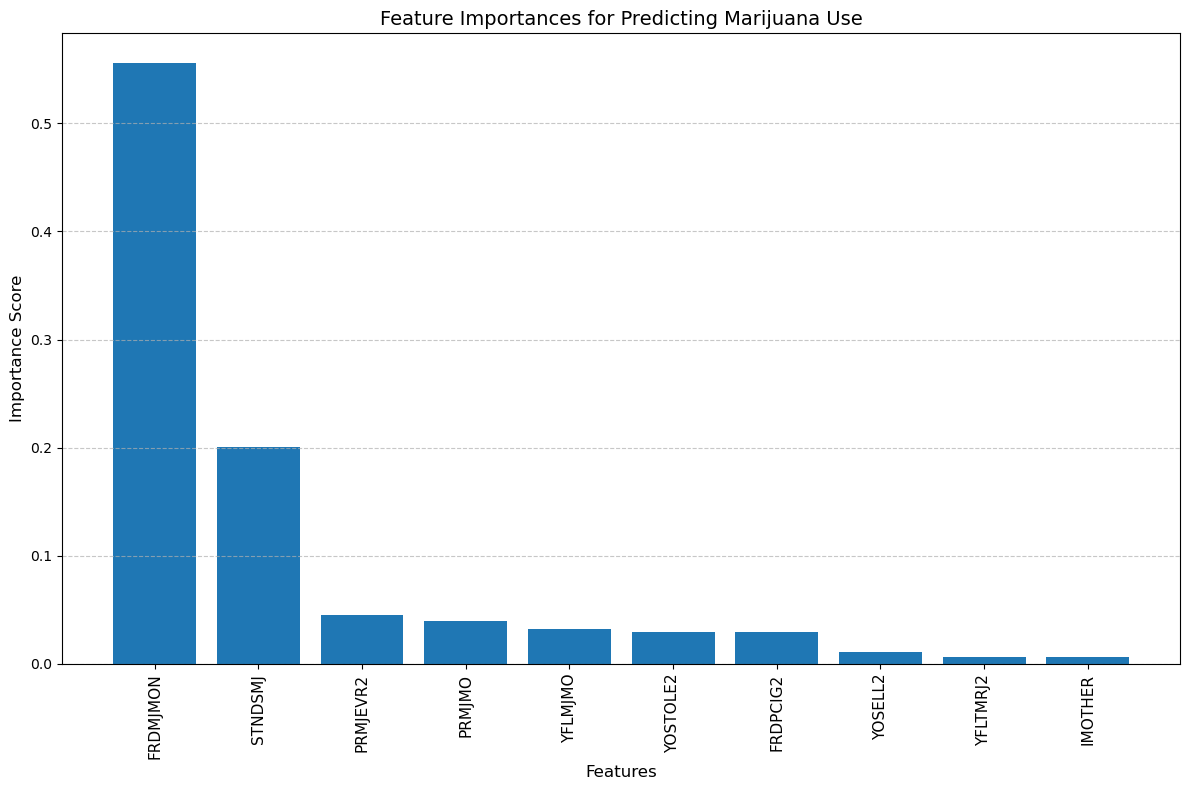

In [44]:
# Feature importance for the best binary classification model
importances = best_dt_binary.feature_importances_
indices = np.argsort(importances)[::-1]

# Let's print feature ranking
print("\nFeature ranking for marijuana use prediction:")
for f in range(min(10, X_features.shape[1])):  # Show top 10 features
    print(f"{f+1}. {X_features.columns[indices[f]]} ({importances[indices[f]]:.4f})")

# Now plot feature importance with proper axis labels
plt.figure(figsize=(12, 8))
plt.title("Feature Importances for Predicting Marijuana Use", fontsize=14)
plt.bar(range(min(10, X_features.shape[1])), 
        importances[indices[:10]],
        align="center")
plt.xticks(range(min(10, X_features.shape[1])), 
          [X_features.columns[i] for i in indices[:10]], 
          rotation=90, fontsize=11)
          
# Add proper axis labels
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)

# Improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

#  Basic tree structure
# Lets Create a simplified tree for visualization
small_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
small_tree.fit(X_train_binary, y_train_binary)

# Plot and save the tree using matplotlib
plt.figure(figsize=(20, 10))
plot_tree(small_tree, 
          feature_names=X_features.columns,
          class_names=['No Use', 'Used'],
          filled=True, 
          rounded=True,
          fontsize=10)
plt.savefig('marijuana_use_tree.png', dpi=300, bbox_inches='tight')
plt.close()

#  Decision boundary visualization using the two most important features
# Get the top two features
importances = small_tree.feature_importances_
indices = np.argsort(importances)[::-1]
top_two_features = [X_features.columns[indices[0]], X_features.columns[indices[1]]]
print(f"Plotting decision boundary using top two features: {top_two_features[0]} and {top_two_features[1]}")

# Lets create a mesh grid for the top two features
x_min, x_max = X_train_binary[top_two_features[0]].min() - 1, X_train_binary[top_two_features[0]].max() + 1
y_min, y_max = X_train_binary[top_two_features[1]].min() - 1, X_train_binary[top_two_features[1]].max() + 1
step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# Lets train a new tree using only these two features for visualization
viz_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
viz_tree.fit(X_train_binary[top_two_features], y_train_binary)

# Lets plot the decision boundary
Z = viz_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
plt.scatter(X_train_binary[top_two_features[0]], X_train_binary[top_two_features[1]], 
            c=y_train_binary, cmap=cmap_bold, edgecolor='k', s=20)

plt.xlabel(top_two_features[0], fontsize=12)
plt.ylabel(top_two_features[1], fontsize=12)
plt.title(f'Decision Boundary Using Top Two Features\n{top_two_features[0]} & {top_two_features[1]}', fontsize=14)
plt.tight_layout()
plt.savefig('marijuana_decision_boundary.png', dpi=300)
plt.close()

Plotting decision boundary using top two features: FRDMJMON and STNDSMJ
